
<center>МИНИСТЕРСТВО НАУКИ И ВЫСШЕГО ОБРАЗОВАНИЯ РОССИЙСКОЙ ФЕДЕРАЦИИ </center>
<center>ФЕДЕРАЛЬНОЕ ГОСУДАРСТВЕННОЕ БЮДЖЕТНОЕ ОБРАЗОВАТЕЛЬНОЕ УЧРЕЖДЕНИЕ ВЫСШЕГО ОБРАЗОВАНИЯ </center>
<center>«НОВОСИБИРСКИЙ ГОСУДАРСТВЕННЫЙ ТЕХНИЧЕСКИЙ УНИВЕРСИТЕТ»</center>
<center>Кафедра Вычислительной техники </center>
<br>
<center> <b> <font size="5">  ОТЧЁТ </font>  </b>  </center>   
<center><font size="3">по лабораторной работе №1</font></center>
<center><font size="3">по дисциплине: «Системы искусственного интеллекта и машинное обучение» </font></center>
<br>

In [3]:
import pandas as pd
import matplotlib 
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import linear_model, metrics

In [4]:
df = pd.read_csv(
    "./datasets/data.csv", 
    sep=';', 
    decimal=',', 
    header=0,
    na_values='>>?<<'
)
df[0:7]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7.229301e+09,2014\10\13,231300.0,2.0,1.00,1180.0,5650.0,1.0,0.0,0.0,...,7.0,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650
1,6.414100e+09,2014\12\09,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,...,7.0,2170.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639
2,5.631500e+09,2015\02\25,180000.0,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,...,6.0,770.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062
3,2.487201e+09,2014\12\09,604000.0,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,...,7.0,1050.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000
4,1.954401e+09,2015\02\18,NaN,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,...,8.0,1680.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503
5,7.237550e+09,2014\05\12,1225000.0,4.0,4.50,5420.0,101930.0,1.0,0.0,0.0,...,11.0,3890.0,1530.0,2001.0,0.0,98053.0,47.6561,-122.005,4760.0,101930
6,1.321400e+09,2014\06\27,257500.0,3.0,2.25,1715.0,6819.0,2.0,0.0,0.0,...,7.0,1715.0,0.0,1995.0,0.0,98003.0,47.3097,-122.327,2238.0,6819


In [5]:
print  (df.shape)
nrow = df.shape[0]
ncol = df.shape[1]
print ("Итого: " + str(nrow) + " записи, " + str(ncol) + " столбец (признак).")

(21613, 21)
Итого: 21613 записи, 21 столбец (признак).


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             40 non-null     float64
 1   date           21609 non-null  object 
 2   price          21609 non-null  float64
 3   bedrooms       21612 non-null  float64
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21608 non-null  float64
 6   sqft_lot       21609 non-null  float64
 7   floors         21607 non-null  float64
 8   waterfront     21607 non-null  float64
 9   view           21607 non-null  float64
 10  condition      21607 non-null  float64
 11  grade          21607 non-null  float64
 12  sqft_above     21607 non-null  float64
 13  sqft_basement  21607 non-null  float64
 14  yr_built       21607 non-null  float64
 15  yr_renovated   21607 non-null  float64
 16  zipcode        21605 non-null  float64
 17  lat            21606 non-null  float64
 18  long  

In [7]:
df["price"] = pd.to_numeric(
    df["price"],
    errors='coerce'
)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             40 non-null     float64
 1   date           21609 non-null  object 
 2   price          21609 non-null  float64
 3   bedrooms       21612 non-null  float64
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21608 non-null  float64
 6   sqft_lot       21609 non-null  float64
 7   floors         21607 non-null  float64
 8   waterfront     21607 non-null  float64
 9   view           21607 non-null  float64
 10  condition      21607 non-null  float64
 11  grade          21607 non-null  float64
 12  sqft_above     21607 non-null  float64
 13  sqft_basement  21607 non-null  float64
 14  yr_built       21607 non-null  float64
 15  yr_renovated   21607 non-null  float64
 16  zipcode        21605 non-null  float64
 17  lat            21606 non-null  float64
 18  long  

In [9]:
print(f"Кол-во уникальных id={ pd.unique(df['id']).size } lat={pd.unique(df['lat']).size} long={pd.unique(df['long']).size} ")

Кол-во уникальных id=41 lat=5034 long=753 


In [10]:
df = df.drop (
    labels = ['id','lat', 'long' ], # список названий столбцов
    axis=1
    )
df[:2]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,2014\10\13,231300.0,2.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3.0,7.0,1180.0,0.0,1955.0,0.0,98178.0,1340.0,5650
1,2014\12\09,538000.0,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951.0,1991.0,98125.0,1690.0,7639


In [11]:
df.isna().sum()

date             4
price            4
bedrooms         1
bathrooms        0
sqft_living      5
sqft_lot         4
floors           6
waterfront       6
view             6
condition        6
grade            6
sqft_above       6
sqft_basement    6
yr_built         6
yr_renovated     6
zipcode          8
sqft_living15    4
sqft_lot15       0
dtype: int64

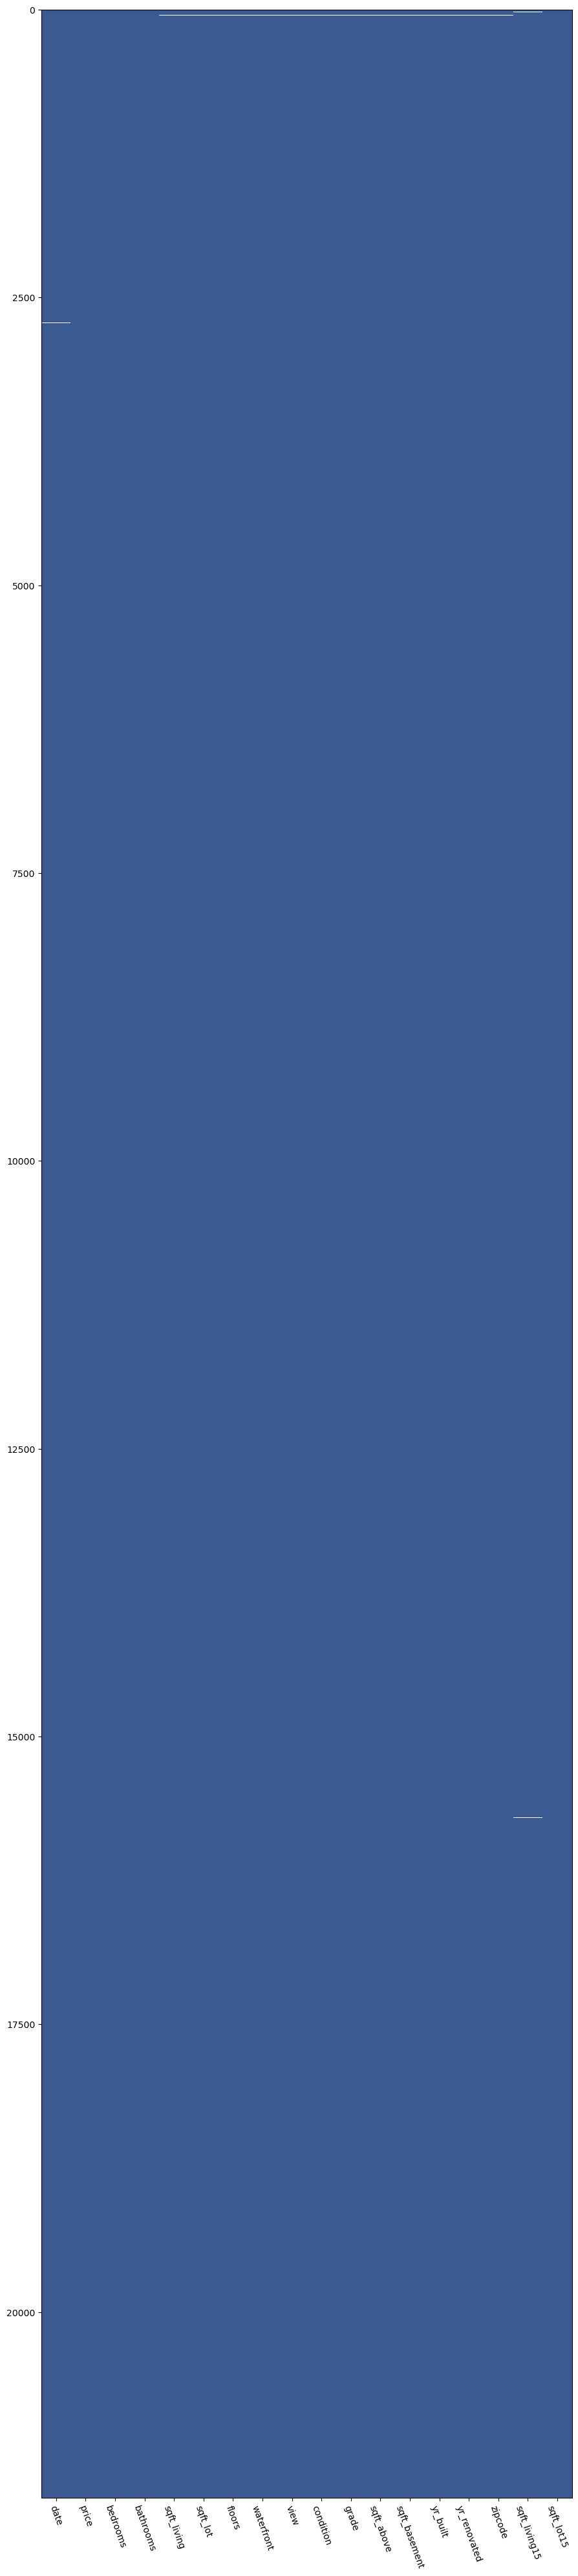

In [12]:
def showEmptyMap(data, ):
    fig, ax = plt.subplots( figsize=(len(data.columns) / 1.7, 50 ))
    plt.imshow( 
            df.isna(),
            cmap = ListedColormap([ '#3B5A92', 'white', ]),
            aspect='auto',
            interpolation= 'none'
        )
    ax.set_xticks(np.arange(len(data.columns)))
    ax.set_xticklabels(data.columns, rotation=-70,)
    plt.grid(False)
showEmptyMap(df)

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
sqft_living15    0
sqft_lot15       0
dtype: int64


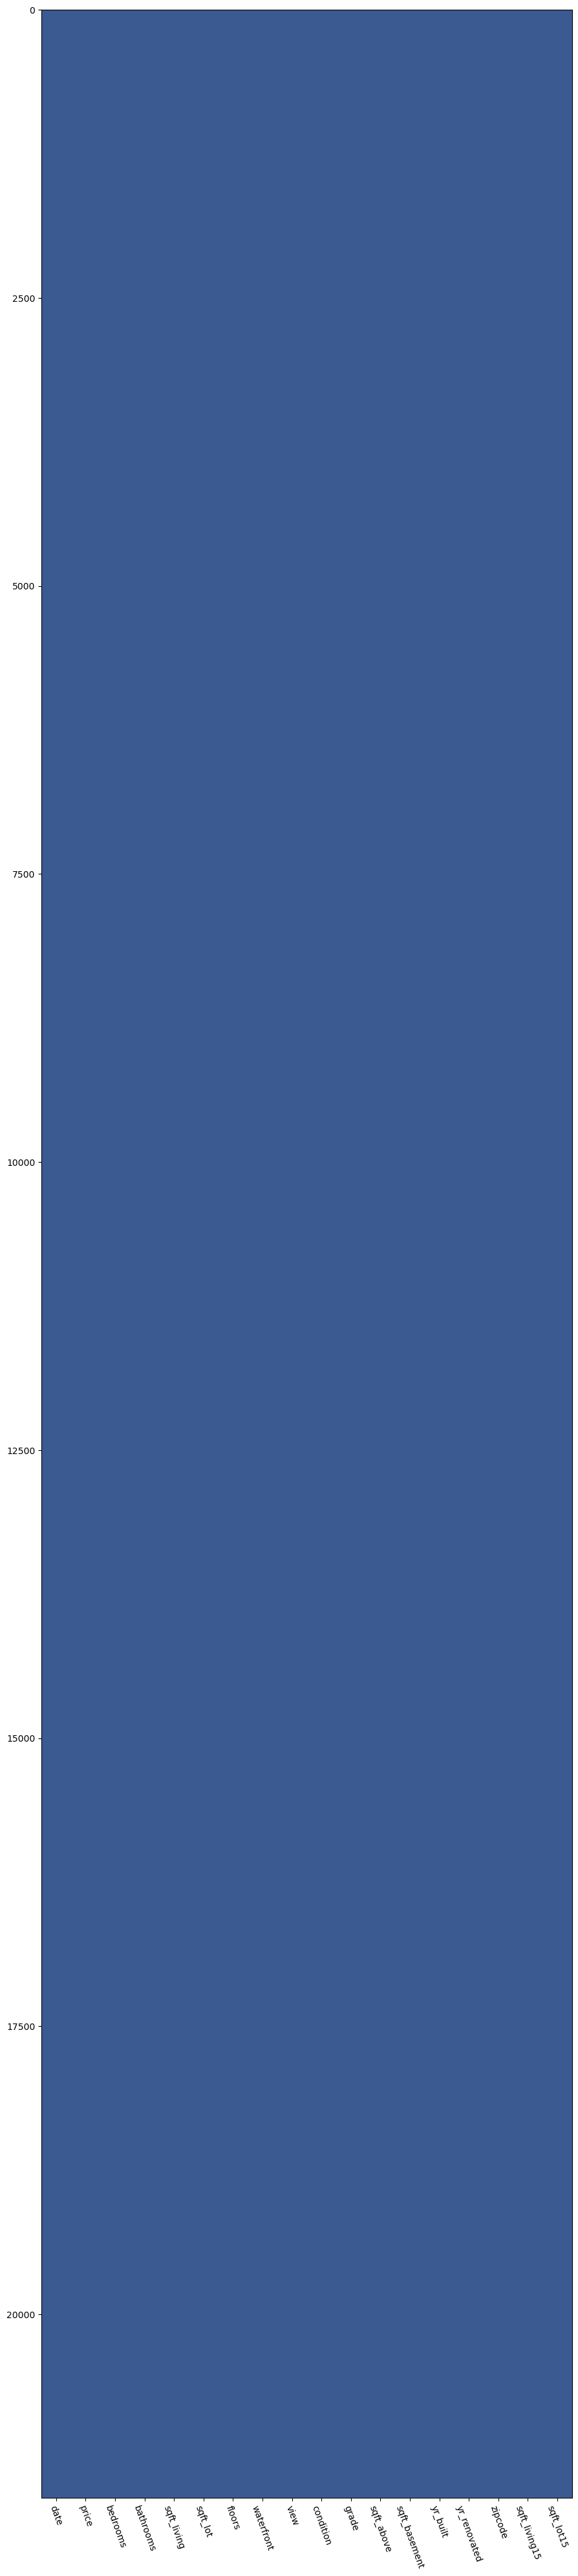

In [13]:
df = df.dropna(axis='index', how='any')
print (df.isna().sum())
showEmptyMap(df)

In [14]:
df.describe(include=['object', 'bool']).T

,count,unique,top,freq
date,21593,372,2014\06\23,142


In [15]:
df['date'] = pd.to_datetime(
    df['date'],
    format='ISO8601'
)
df['date_dayofweek'] = df['date'].dt.day_of_week
df['date_day'] = df['date'].dt.day
df['date_month'] = df['date'].dt.month
df.info()
df[ ['date', 'date_month', 'date_day'] ][:3]

<class 'pandas.core.frame.DataFrame'>
Index: 21593 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            21593 non-null  datetime64[ns]
 1   price           21593 non-null  float64       
 2   bedrooms        21593 non-null  float64       
 3   bathrooms       21593 non-null  float64       
 4   sqft_living     21593 non-null  float64       
 5   sqft_lot        21593 non-null  float64       
 6   floors          21593 non-null  float64       
 7   waterfront      21593 non-null  float64       
 8   view            21593 non-null  float64       
 9   condition       21593 non-null  float64       
 10  grade           21593 non-null  float64       
 11  sqft_above      21593 non-null  float64       
 12  sqft_basement   21593 non-null  float64       
 13  yr_built        21593 non-null  float64       
 14  yr_renovated    21593 non-null  float64       
 15  zipcode

,date,date_month,date_day
0,2014-10-13,10,13
1,2014-12-09,12,9
2,2015-02-25,2,25


In [16]:
#ненужный объект
df = df.drop (
    labels = ['date' ], # список названий столбцов
    axis=1
    )

corr_df = df.corr(method='pearson')

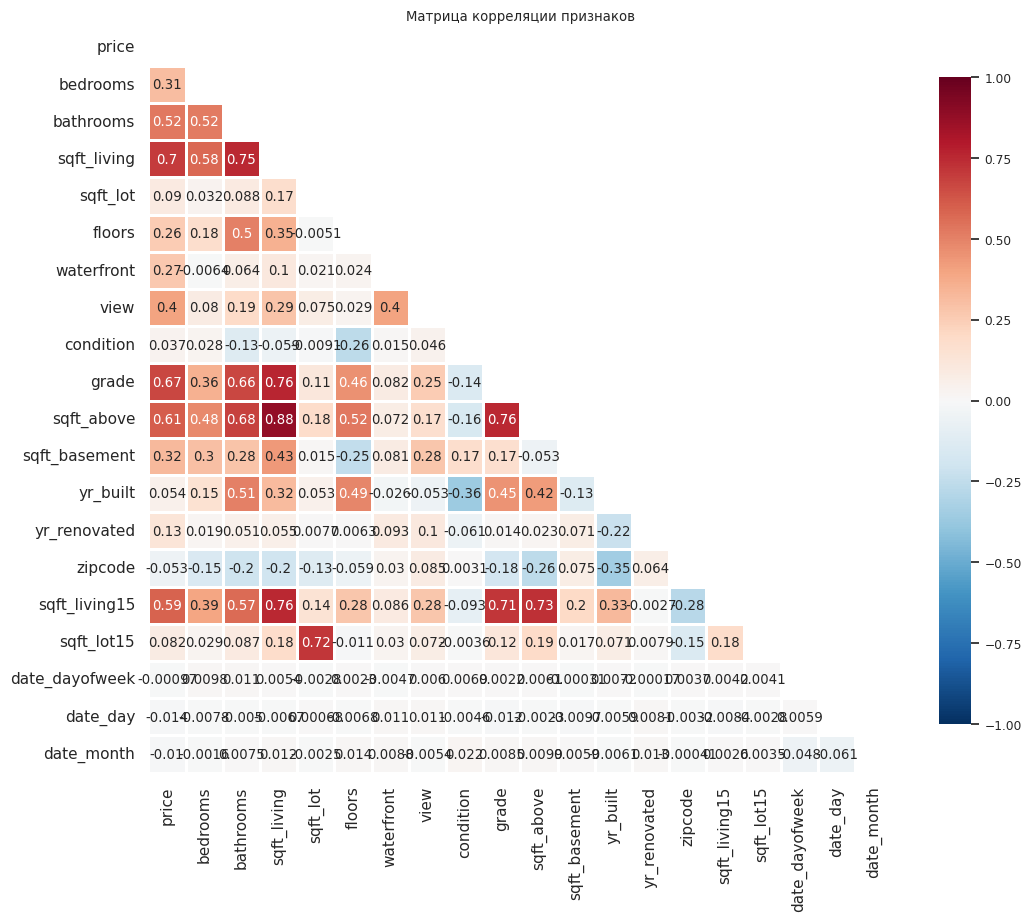

In [17]:
sns.set(style="white")
mask = np.zeros_like(corr_df, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(12,12))
sns.set(font_scale=0.8) # размер шрифта

# Построить тепловую карту
sns.heatmap(
            ##################
            data=corr_df,   ### <<<- объект-матрица корреляции
            ##################
            vmin=-1, vmax=1, center=0,
            annot=True,
            cmap = 'RdBu_r',
            mask=mask,   # применить маску
            square=True, # форма ячейки - квадрат
            linewidths=1.0, # зазор между ячейки
            cbar_kws={"shrink": .7}  # уменьшить размер легенды
           )
plt.title(u'Матрица корреляции признаков');

In [18]:
corr_df[["price"]].abs().sort_values('price')

,price
date_dayofweek,0.000969
date_month,0.010174
date_day,0.013727
condition,0.036646
zipcode,0.052814
yr_built,0.053603
sqft_lot15,0.082355
sqft_lot,0.089674
yr_renovated,0.127156
floors,0.257403


<Figure size 700x700 with 0 Axes>

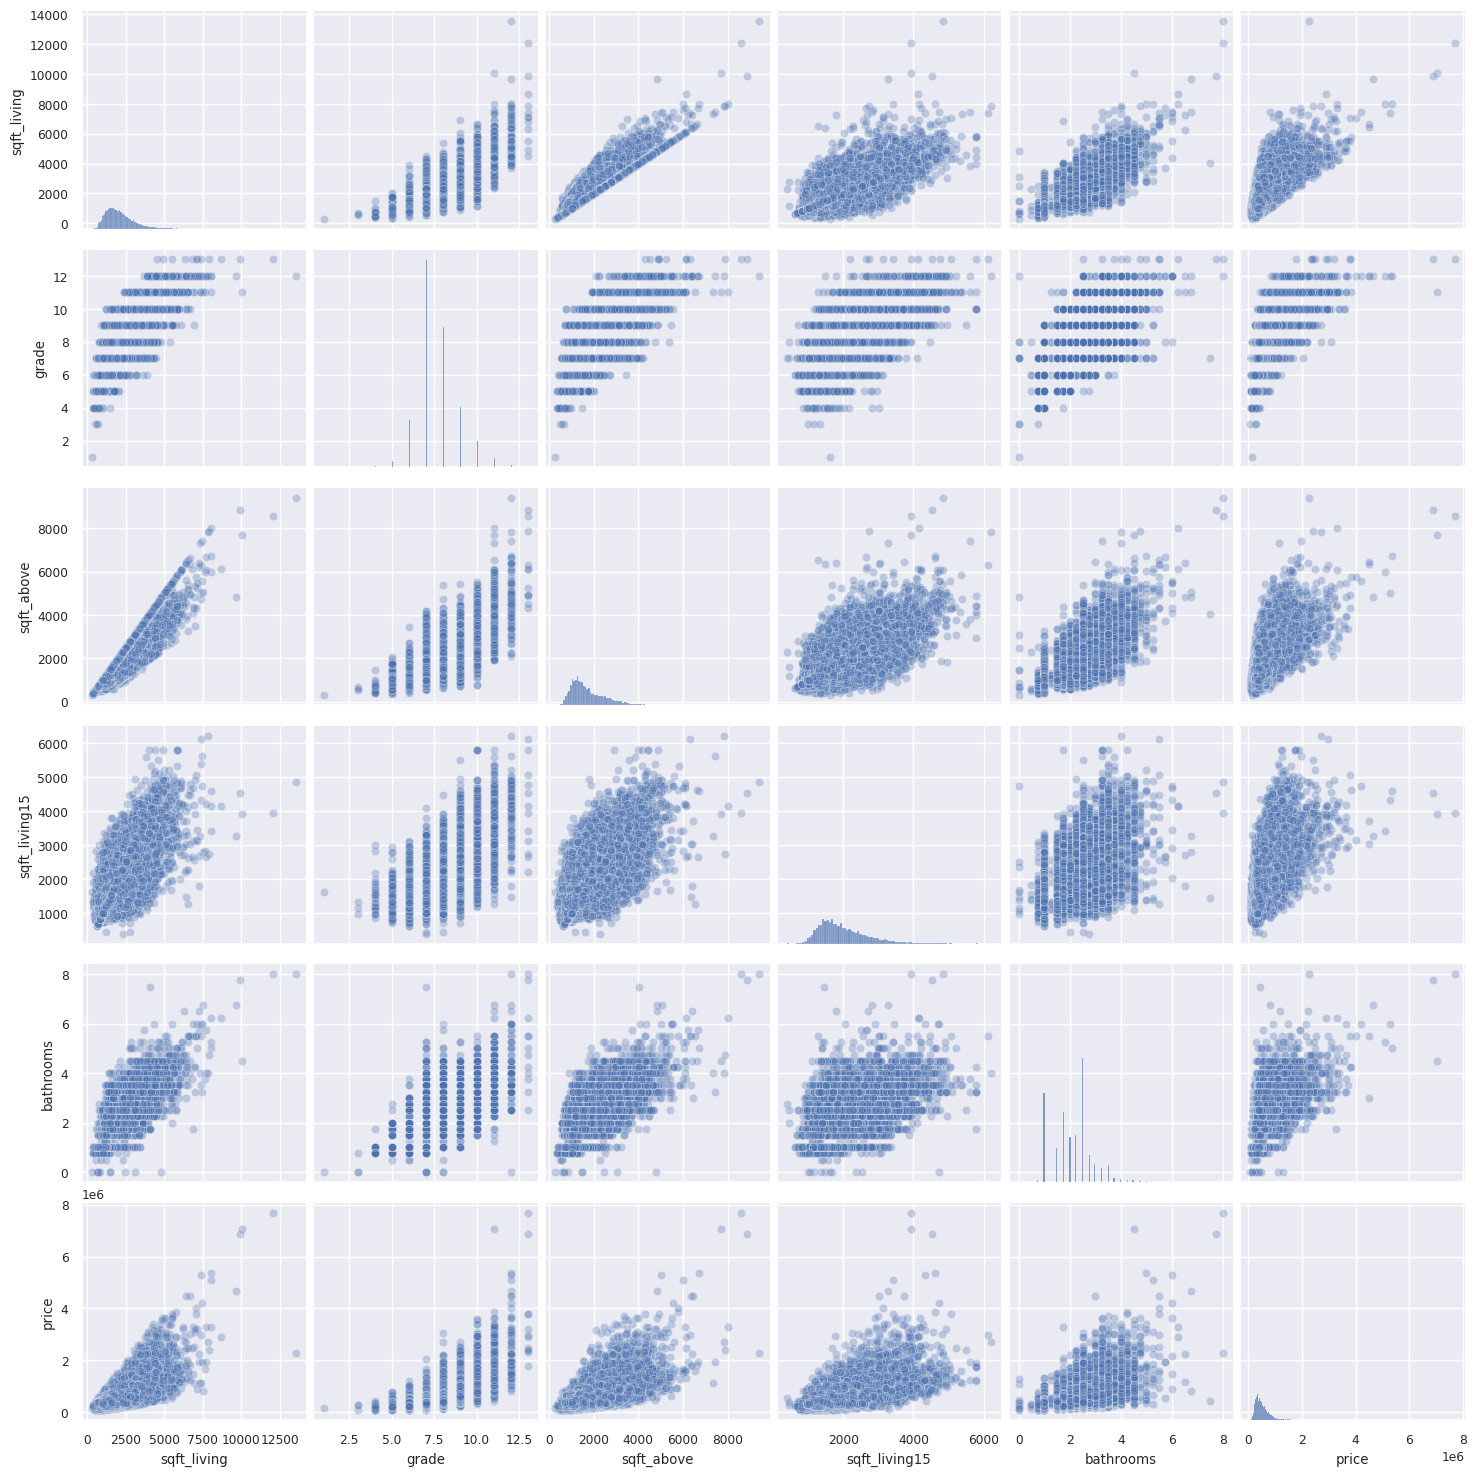

In [19]:
features = ['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms']
target = ['price']
plt.figure(figsize=(7,7))
%config InlineBackend.figure_format = 'png'
sns.pairplot(
    df[features + target],
    #hue = 'Type',         # Признак разделения
    kind="scatter",        # Тип даграмм: reg,scatter
    diag_kind = 'hist',     # Тип диагоральных даграмм: hist, kde
    plot_kws={'alpha':0.3} # прозрачность точек
)

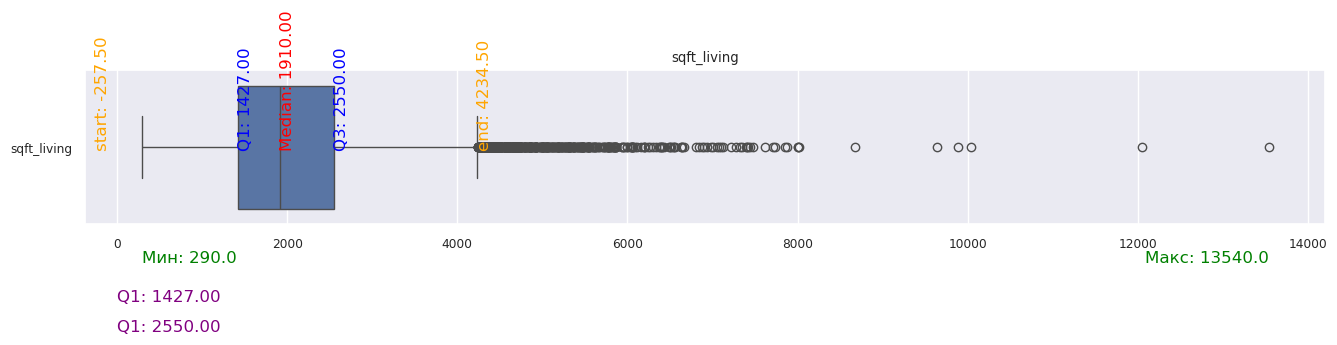

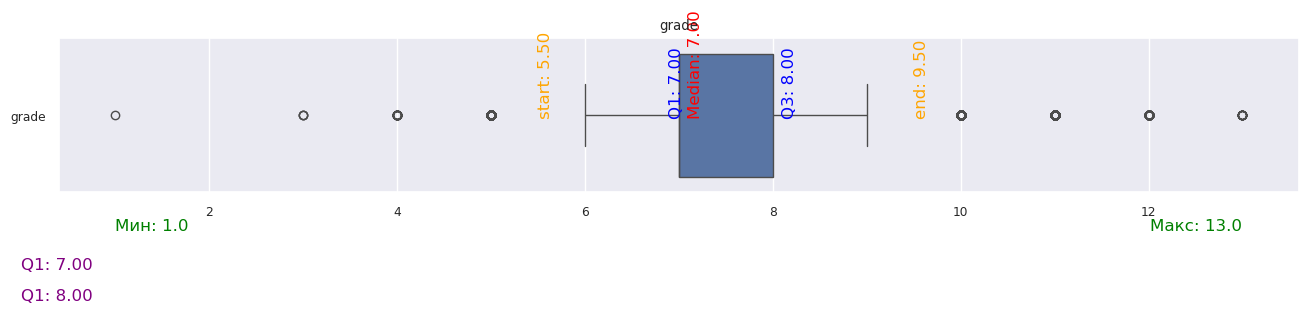

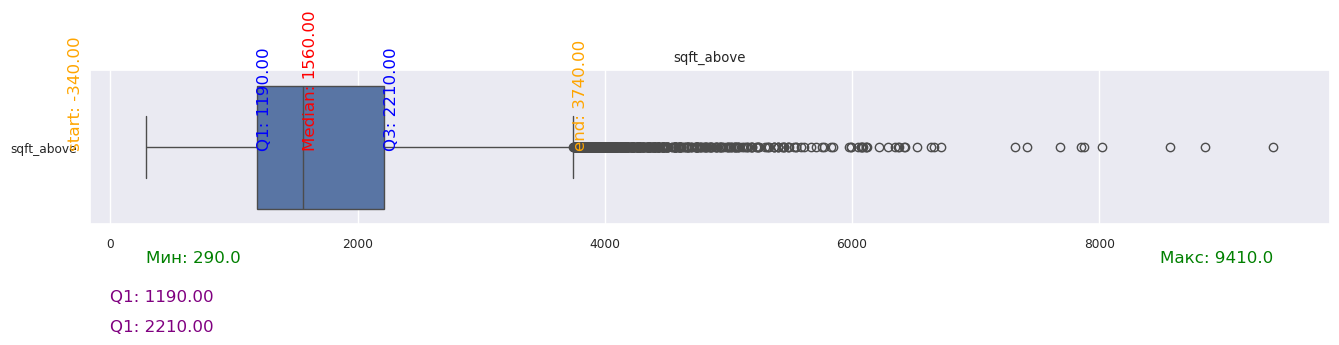

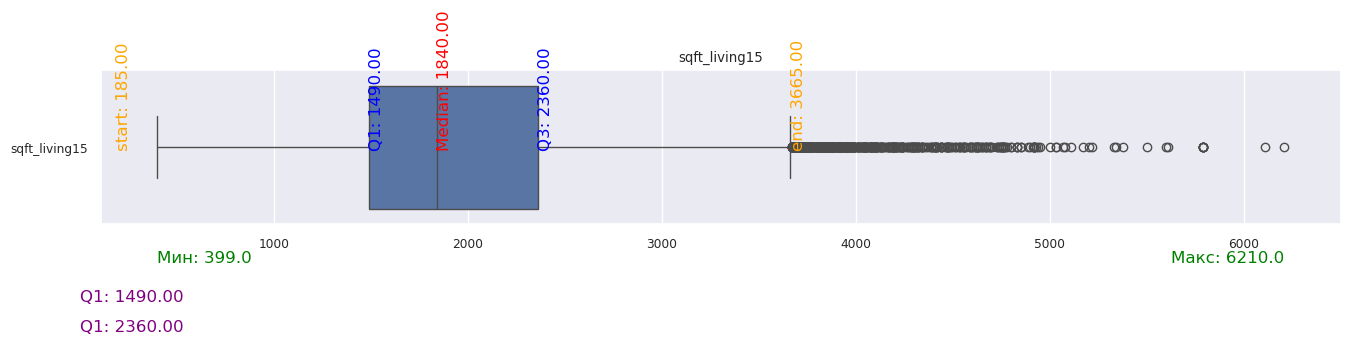

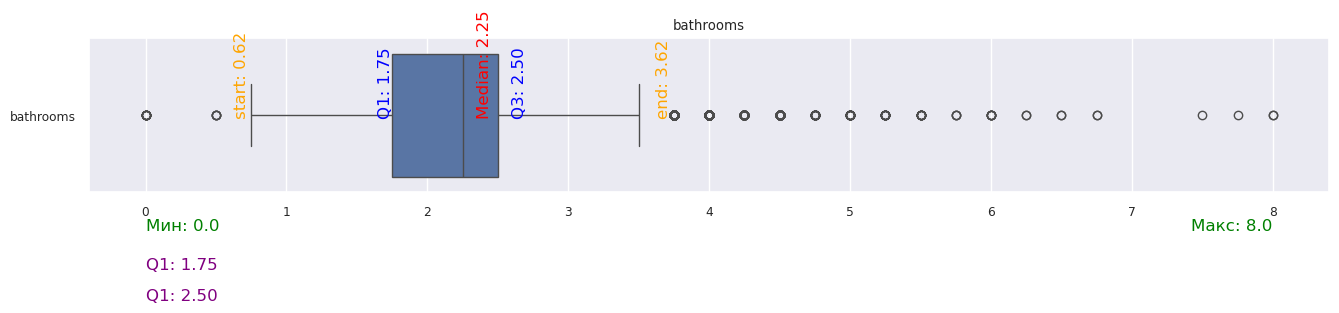

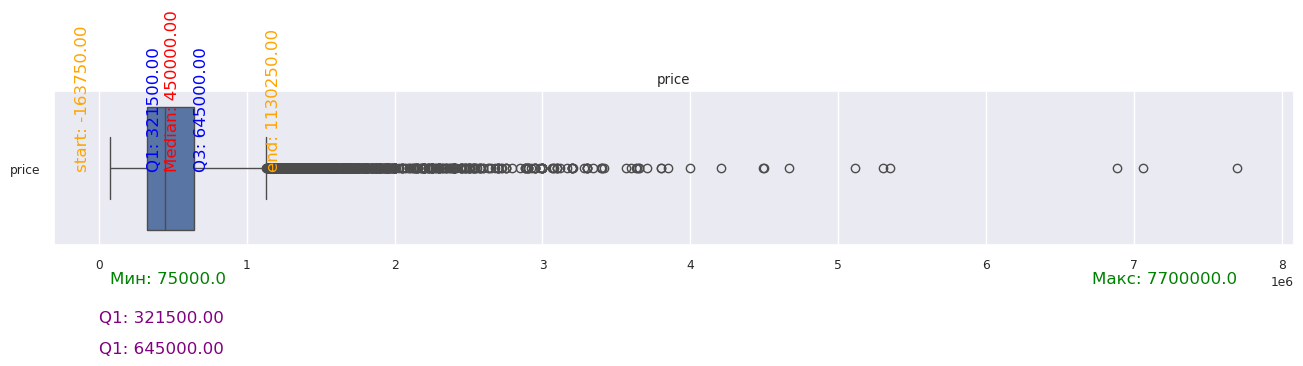

In [20]:
for feature_name in (features+target):

    # Построить полотно для рисования с указанным размером
    plt.figure(figsize=(16,2))

    # На созданном полотне отрисовать boxplot
    sns.boxplot( 
      data=df[[feature_name]], # данные
      orient='h' # ориентация графика
               )
    median = df[feature_name].median()
    #quantiles = df[feature_name].quantile([0.25, 0.75])
    min_val = df[feature_name].min()
    max_val = df[feature_name].max()

    Q1 = df[feature_name].quantile(0.25)
    Q3 = df[feature_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    plt.text(median + 0.1, 0, f'Median: {median:.2f}', color='red', fontsize=12,rotation=90)
    plt.text(Q1 - 0.1, 0, f'Q1: {Q1:.2f}', color='blue', fontsize=12, rotation=90)
    plt.text(Q3 + 0.1, 0, f'Q3: {Q3:.2f}', color='blue', fontsize=12, rotation=90)
    plt.text(0 , 1, f'Q1: {Q1:.2f}', color='purple', fontsize=12, rotation=0)
    plt.text(0, 1.2, f'Q1: {Q3:.2f}', color='purple', fontsize=12, rotation=0)
    plt.text(min_val, 0.75, f'Мин: {min_val}', color='green', fontsize=12, horizontalalignment='left')
    plt.text(max_val, 0.75, f'Макс: {max_val}', color='green', fontsize=12, horizontalalignment='right')
    plt.text(lower_bound, 0, f'start: {lower_bound:.2f}', color='orange', fontsize=12, rotation=90)
    plt.text(upper_bound, 0, f'end: {upper_bound:.2f}', color='orange', fontsize=12, rotation=90)



    plt.title(feature_name)
    plt.show()


In [21]:
#features = ['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms']
#target = ['price']


"""tressholdDict = {
    'sqft_living' : (290,4234),
    'grade' : (6, 9),
    'sqft_above' : (290,3740),
    'sqft_living15' : (399,3665),
    'bathrooms' : (0,4),
    'price' : (75000, 1130250),
}"""
tressholdDict = {
    'sqft_living' : (0,4234),
    'grade' : (4, 10),
    'sqft_above' : (0,4000),
    'sqft_living15' : (185,3700),
    'bathrooms' : (0,4),
    'price' : (80000, 1140000),
}

print (tressholdDict)

{'sqft_living': (0, 4234), 'grade': (4, 10), 'sqft_above': (0, 4000), 'sqft_living15': (185, 3700), 'bathrooms': (0, 4), 'price': (80000, 1140000)}


In [22]:
for feature_name  in tressholdDict:
    threesMin =  tressholdDict[feature_name][0] # извлечь нижнее пороговое
    tresshMax =  tressholdDict[feature_name][1] # извлечь верхнее пороговое

    # Получить кол-во эл. вне пороговых значений. Прием - фильтрация
    over_count = len(  df[
                            ~((df[feature_name] >= threesMin ) & (df[feature_name] <= tresshMax)) # фильтр по двум границам. ~ инверсия логических значений
                          ]
                    )

    dcount = df[feature_name].count() # кол-во эл. общее

    print ('''{}. Принимаем пороговые значение равными {}.
  Кол-во эл. вне пороговых - {} из {} значение(ий) ({:.1%})\n'''.format(
        feature_name,
        tressholdDict[feature_name],
        over_count,
        dcount,
        over_count/ dcount,
    ))

sqft_living. Принимаем пороговые значение равными (0, 4234).
  Кол-во эл. вне пороговых - 571 из 21593 значение(ий) (2.6%)

grade. Принимаем пороговые значение равными (4, 10).
  Кол-во эл. вне пороговых - 505 из 21593 значение(ий) (2.3%)

sqft_above. Принимаем пороговые значение равными (0, 4000).
  Кол-во эл. вне пороговых - 411 из 21593 значение(ий) (1.9%)

sqft_living15. Принимаем пороговые значение равными (185, 3700).
  Кол-во эл. вне пороговых - 504 из 21593 значение(ий) (2.3%)

bathrooms. Принимаем пороговые значение равными (0, 4).
  Кол-во эл. вне пороговых - 265 из 21593 значение(ий) (1.2%)

price. Принимаем пороговые значение равными (80000, 1140000).
  Кол-во эл. вне пороговых - 1123 из 21593 значение(ий) (5.2%)



In [23]:
df_digPlusFiltred = df.copy()

for feature_name  in tressholdDict:
    threesMin =  tressholdDict[feature_name][0]
    tresshMax =  tressholdDict[feature_name][1]


    # фильтр по двум границам. Оператор "~" -инверсия логических значений
    df_digPlusFiltred = df_digPlusFiltred[
        (df_digPlusFiltred[feature_name] >= threesMin ) & (df_digPlusFiltred[feature_name] <= tresshMax)
        ]
    print("Обработан ", feature_name )


print ("Отброшено {} строк. Осталось {} строк.".format(
    len(df)  - len(df_digPlusFiltred),
    len(df_digPlusFiltred))
)

Обработан  sqft_living
Обработан  grade
Обработан  sqft_above
Обработан  sqft_living15
Обработан  bathrooms
Обработан  price
Отброшено 1623 строк. Осталось 19970 строк.


Проверим, что все ок:

In [24]:
for feature_name  in tressholdDict:
    threesMin =  tressholdDict[feature_name][0] # извлечь нижнее пороговое
    tresshMax =  tressholdDict[feature_name][1] # извлечь верхнее пороговое

    # Получить кол-во эл. вне пороговых значений. Прием - фильтрация
    over_count = len(  df_digPlusFiltred[
                            ~((df_digPlusFiltred[feature_name] >= threesMin ) & (df_digPlusFiltred[feature_name] <= tresshMax)) # фильтр по двум границам. ~ инверсия логических значений
                          ]
                    )

    dcount = df_digPlusFiltred[feature_name].count() # кол-во эл. общее

    print ('''{}. Принимаем пороговые значение равными {}.
  Кол-во эл. вне пороговых - {} из {} значение(ий) ({:.1%})\n'''.format(
        feature_name,
        tressholdDict[feature_name],
        over_count,
        dcount,
        over_count/ dcount,
    ))

sqft_living. Принимаем пороговые значение равными (0, 4234).
  Кол-во эл. вне пороговых - 0 из 19970 значение(ий) (0.0%)

grade. Принимаем пороговые значение равными (4, 10).
  Кол-во эл. вне пороговых - 0 из 19970 значение(ий) (0.0%)

sqft_above. Принимаем пороговые значение равными (0, 4000).
  Кол-во эл. вне пороговых - 0 из 19970 значение(ий) (0.0%)

sqft_living15. Принимаем пороговые значение равными (185, 3700).
  Кол-во эл. вне пороговых - 0 из 19970 значение(ий) (0.0%)

bathrooms. Принимаем пороговые значение равными (0, 4).
  Кол-во эл. вне пороговых - 0 из 19970 значение(ий) (0.0%)

price. Принимаем пороговые значение равными (80000, 1140000).
  Кол-во эл. вне пороговых - 0 из 19970 значение(ий) (0.0%)



sqft_living 370.0 4230.0
grade 4.0 10.0
sqft_above 370.0 4000.0
sqft_living15 399.0 3700.0
bathrooms 0.0 4.0
price 80000.0 1140000.0


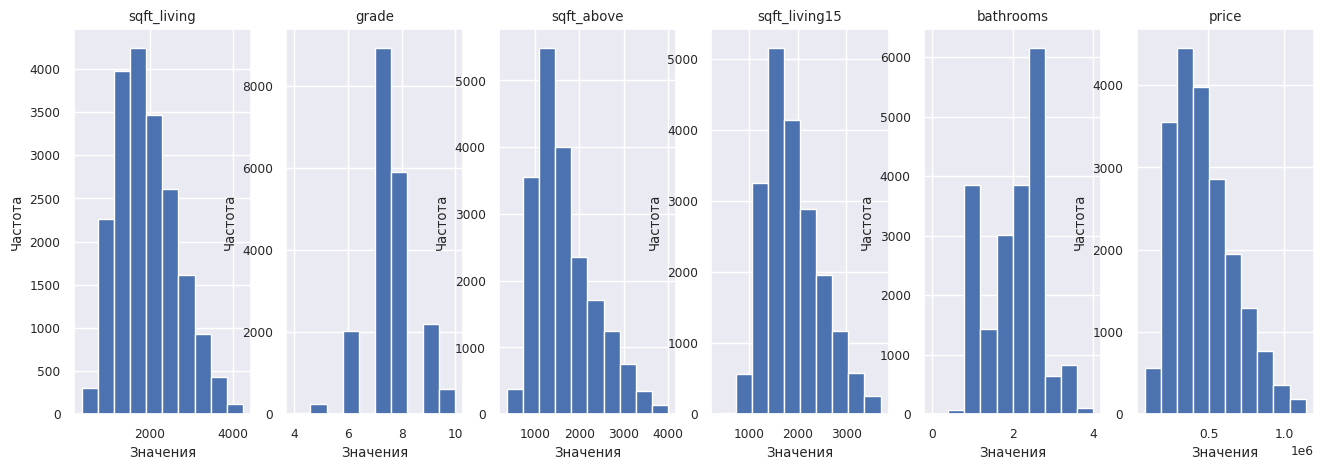

In [25]:
# Строим гистограммы по каждому признаку:
# data[features].hist() #Упрощенный вывод графиков

plt.figure(figsize=(16, 5))
plot_number = 0

for feature_name in (features+target):
    plot_number += 1

    plt.subplot(1, len(features+target), plot_number)

    plt.hist(df_digPlusFiltred[feature_name]) # Построение гистрограммы

    plt.title(feature_name)
    plt.xlabel(u'Значения')
    plt.ylabel(u'Частота')
    print (feature_name,
           df_digPlusFiltred[feature_name].min(),
           df_digPlusFiltred[feature_name].max())

In [26]:
df_digPlusFiltred.to_csv('./datasets/melbourne_data_PREPARED.csv', # путь для сохранения
            index=False, # запрет сохранения "индексов" (тек. номеров строк)
           )

In [27]:
valid_size = 0.3 # доля тестовой части в выборке
rand_seed = 8 # начальное состояние генератора случ. чисел

x_train, x_test, y_train, y_test =  train_test_split(
    df_digPlusFiltred[features],    # исходные данные X
    df_digPlusFiltred[target],      # исходные данные y

    test_size = valid_size, # доля тестовой части в выборке
    random_state=rand_seed, # начальное состояние генератора случ. чисел
    shuffle=True            # перемешивание
)

In [28]:
print ("Кол-во элементов: \n  x_train: {}, y_train {} \n  x_test:  {}, y_test  {} \n  total x: {}, total y {} ".format  (
    len(x_train), len(y_train),
    len(x_test),  len(y_test),
    len(x_train)+len(x_test), len(y_train)+len(y_test),
))

Кол-во элементов: 
  x_train: 13979, y_train 13979 
  x_test:  5991, y_test  5991 
  total x: 19970, total y 19970 


In [29]:
x_test[:3]

,sqft_living,grade,sqft_above,sqft_living15,bathrooms
20871,1950.0,9.0,1610.0,2040.0,3.00
8367,3150.0,9.0,2250.0,2210.0,2.75
16891,2920.0,8.0,1460.0,2380.0,2.50


In [30]:
y_test[:3]

,price
20871,798500.0
8367,370000.0
16891,1015000.0


## Создадим модель:

In [31]:
model_lin_empty = linear_model.LinearRegression()

Введем матрицу значений и результатов:

In [32]:
model_lin_fitted_sqft_living = model_lin_empty.fit(
    x_train[['sqft_living']],
    y_train[['price']]
)

In [33]:
y_pred_price_with_sqft_living = model_lin_fitted_YearBuilt.predict(x_test[['sqft_living']])

NameError: name 'model_lin_fitted_YearBuilt' is not defined

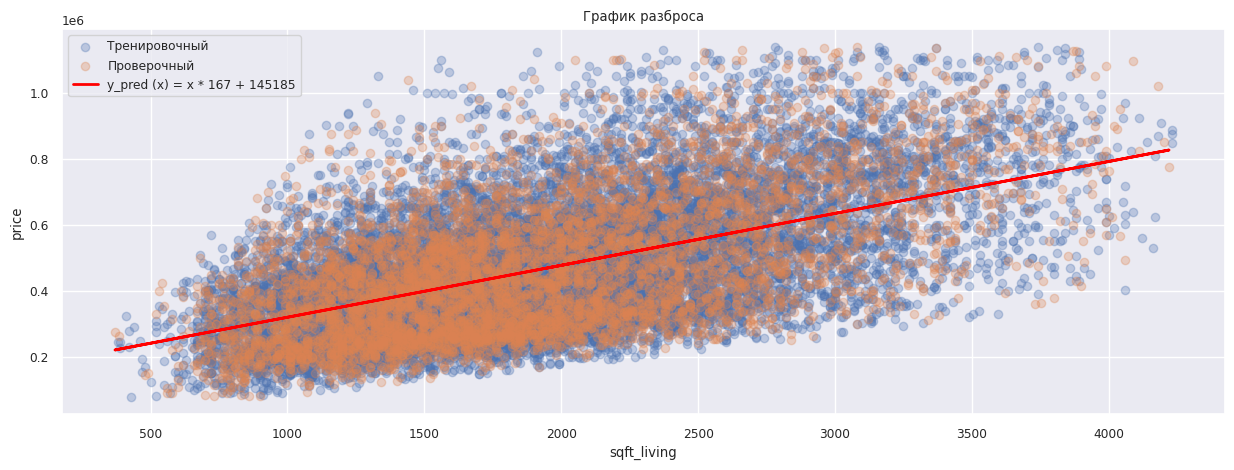

In [989]:
plt.figure(figsize=(15,5))

plt.scatter(x_train[['sqft_living']],  y_train[['price']], alpha=0.3, label='Тренировочный')
plt.scatter(x_test[['sqft_living']],   y_test[['price']],  alpha=0.3, label='Проверочный')

# Нанести график - линии через точки - plt.plot
label_str = "y_pred (x) = x * {:.0f} + {:.0f}".format(model_lin_fitted_sqft_living.coef_[0][0], model_lin_fitted_sqft_living.intercept_[0])

plt.plot( x_test[['sqft_living']], y_pred_price_with_sqft_living,
            lw=2, color='red', label=label_str)

plt.legend(loc="best")  # положение легенды
plt.xlabel('sqft_living') # подпись осей
plt.ylabel(target[0])   # подпись осей
plt.title(u'График разброса'); # Заголовок

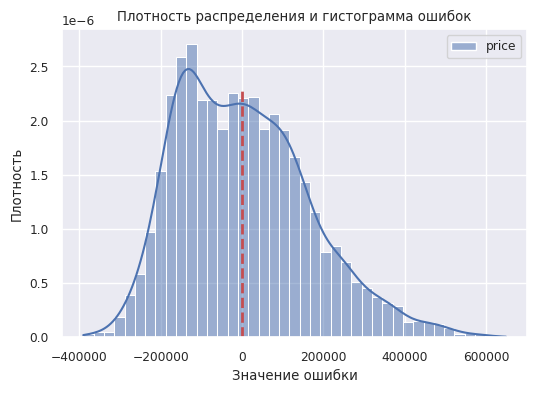

In [990]:
plt.figure(figsize=(6,4))

# Гистограмма и Плотность распределения - sns.distplot
# data = y_true - y_pred
sns.histplot( data = y_test[['price']] - y_pred_price_with_sqft_living,
              color="red",
              kde=True, # оценка плотности в виде кривой
              stat="density",# density: общая площадь равна 1
            )

# Осевая линия
plt.plot(
    [0, 0],
    [0, 23 * pow(10,-7)], '--', lw=2, c='r')

plt.ylabel(u'Плотность')
plt.xlabel(u'Значение ошибки')
plt.title(u'Плотность распределения и гистограмма ошибок');
plt.show()

Text(0, 0.5, 'Абсолютная ошибка')

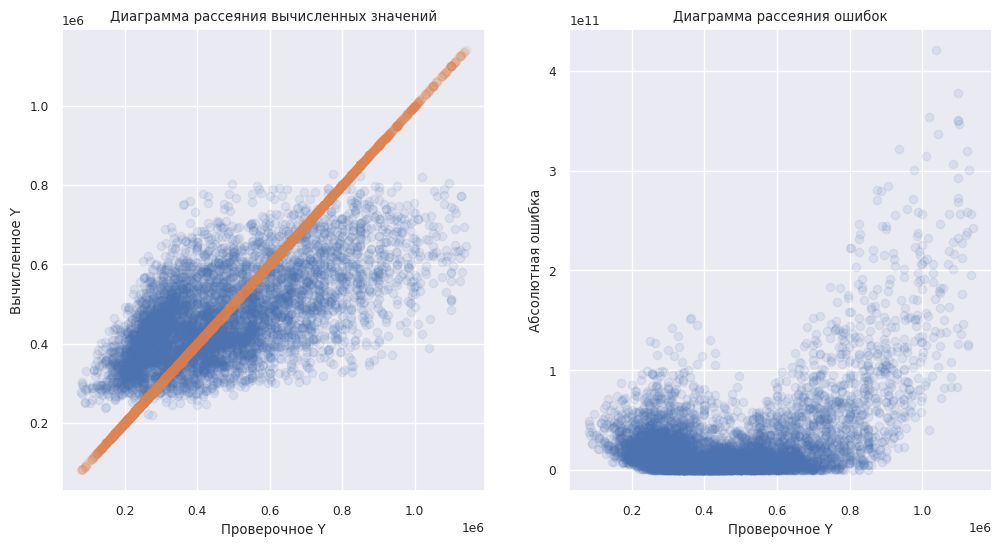

In [991]:
plt.figure(figsize=(12,6))

# создать первое полотно 121: 1-строк, 2-столбцов, 1-индекс в сетке
plt.subplot(121)
plt.scatter(y_test[['price']], y_pred_price_with_sqft_living,  alpha=0.1)
plt.scatter(y_test[['price']], y_test[['price']],  alpha=0.1)
plt.title('Диаграмма рассеяния вычисленных значений');
plt.xlabel('Проверочное Y')
plt.ylabel('Вычисленное Y')

# создать первое полотно 121: 1-строк, 2-столбцов, 2-индекс в сетке
plt.subplot(122)
plt.scatter(y_test[['price']], (y_test[['price']] - y_pred_price_with_sqft_living)**2,  alpha=0.1)

plt.title('Диаграмма рассеяния ошибок')
plt.xlabel('Проверочное Y')
plt.ylabel('Абсолютная ошибка')

In [992]:
print ("Линейная одномерная регрессия. Признак 'sqft_living'.")
print ("y_pred_price_with_sqft_living (x) = x * {} + {}\n".format(
              model_lin_fitted_sqft_living.coef_,
              model_lin_fitted_sqft_living.intercept_))

'''
Вычисление и вывод метрик: MAE, RMSE, R2.
На основе сравнения проверочных и вычисленных.
'''
mae  = metrics.mean_absolute_error(y_test, y_pred_price_with_sqft_living)
mse  = metrics.mean_squared_error (y_test, y_pred_price_with_sqft_living)
rmse = np.sqrt(mse)
r2   = metrics.r2_score           (y_test, y_pred_price_with_sqft_living)

print ("MAE : {:>9,.3f} (средняя абсолютная ошибка)".format              ( mae ))
print ("MSE : {:>9,.6f} (среднеквадратичная ошибка)".format( mse ))
print ("RMSE: {:>9,.6f} (кв. корень из среднеквадратичной ошибки)".format( rmse ))
print ("R2  : {:>9,.3f} (коэфф. детерминации)".format                    ( r2 ))

Линейная одномерная регрессия. Признак 'sqft_living'.
y_pred_price_with_sqft_living (x) = x * [[167.29637045]] + [145184.92267042]

MAE : 132,115.687 (средняя абсолютная ошибка)
MSE : 26,745,433,269.783070 (среднеквадратичная ошибка)
RMSE: 163,540.310840 (кв. корень из среднеквадратичной ошибки)
R2  :     0.353 (коэфф. детерминации)


## Своя МНОГОМЕРНАЯ модель:

In [993]:
print(corr_df[["price"]].abs().sort_values('price'))
print(tressholdDict)
x_test[:3]

                   price
date_dayofweek  0.000969
date_month      0.010174
date_day        0.013727
condition       0.036646
zipcode         0.052814
yr_built        0.053603
sqft_lot15      0.082355
sqft_lot        0.089674
yr_renovated    0.127156
floors          0.257403
waterfront      0.267288
bedrooms        0.308703
sqft_basement   0.321561
view            0.399090
bathrooms       0.524663
sqft_living15   0.586498
sqft_above      0.605302
grade           0.667790
sqft_living     0.701177
price           1.000000
{'sqft_living': (0, 4234), 'grade': (4, 10), 'sqft_above': (0, 4000), 'sqft_living15': (185, 3700), 'bathrooms': (0, 4), 'price': (80000, 1140000)}


,sqft_living,grade,sqft_above,sqft_living15,bathrooms
20871,1950.0,9.0,1610.0,2040.0,3.00
8367,3150.0,9.0,2250.0,2210.0,2.75
16891,2920.0,8.0,1460.0,2380.0,2.50


In [994]:
model_new = linear_model.LinearRegression()

In [995]:
model_new_fitted = model_new.fit(
    x_train[['grade','sqft_living', 'bathrooms']],
    y_train[['price']]
)
y_pred_new = model_new_fitted.predict(x_test[['grade','sqft_living', 'bathrooms']])

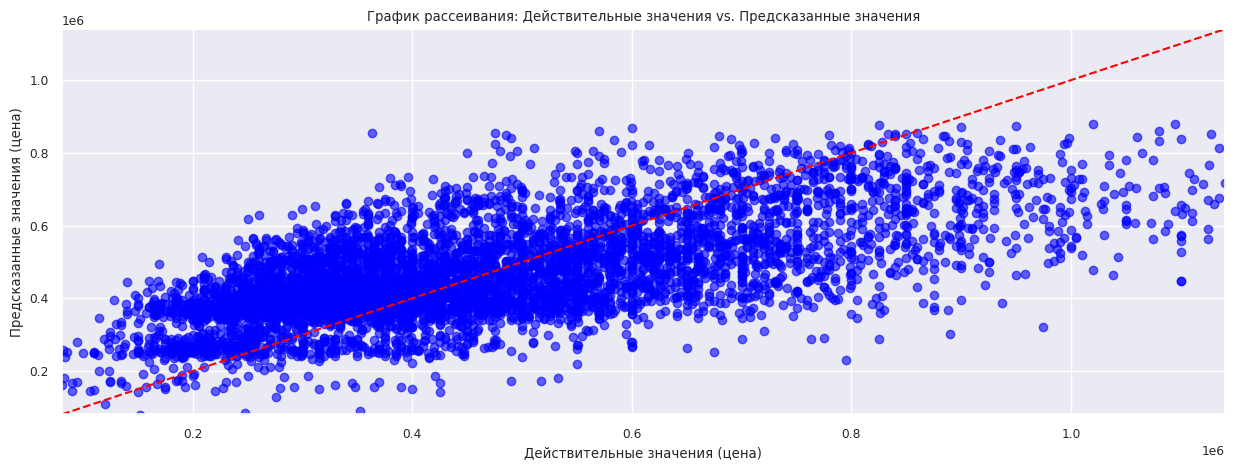

In [996]:
y_test_values = y_test['price'].values  # Замените 'price' на соответствующий столбец

# Создание графика рассеивания
plt.figure(figsize=(15, 5))
plt.scatter(y_test_values, y_pred_new, alpha=0.6, color='blue')

# Добавление линии y=x для сравнения
plt.plot([y_test_values.min(), y_test_values.max()],
         [y_test_values.min(), y_test_values.max()],
         color='red', linestyle='--')

# Настройки графика
plt.title('График рассеивания: Действительные значения vs. Предсказанные значения')
plt.xlabel('Действительные значения (цена)')
plt.ylabel('Предсказанные значения (цена)')
plt.grid(True)
plt.xlim(y_test_values.min(), y_test_values.max())
plt.ylim(y_test_values.min(), y_test_values.max())
plt.show()

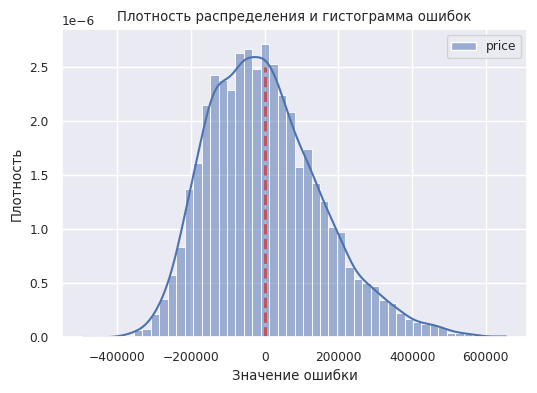

In [997]:
plt.figure(figsize=(6,4))

# Гистограмма и Плотность распределения - sns.distplot
# data = y_true - y_pred
sns.histplot( data = y_test[['price']] - y_pred_new,
              color="red",
              kde=True, # оценка плотности в виде кривой
              stat="density",# density: общая площадь равна 1
            )

# Осевая линия
plt.plot(
    [0, 0],
    [0, 25 * pow(10,-7)], '--', lw=2, c='r')

plt.ylabel(u'Плотность')
plt.xlabel(u'Значение ошибки')
plt.title(u'Плотность распределения и гистограмма ошибок');
plt.show()

Text(0, 0.5, 'Абсолютная ошибка')

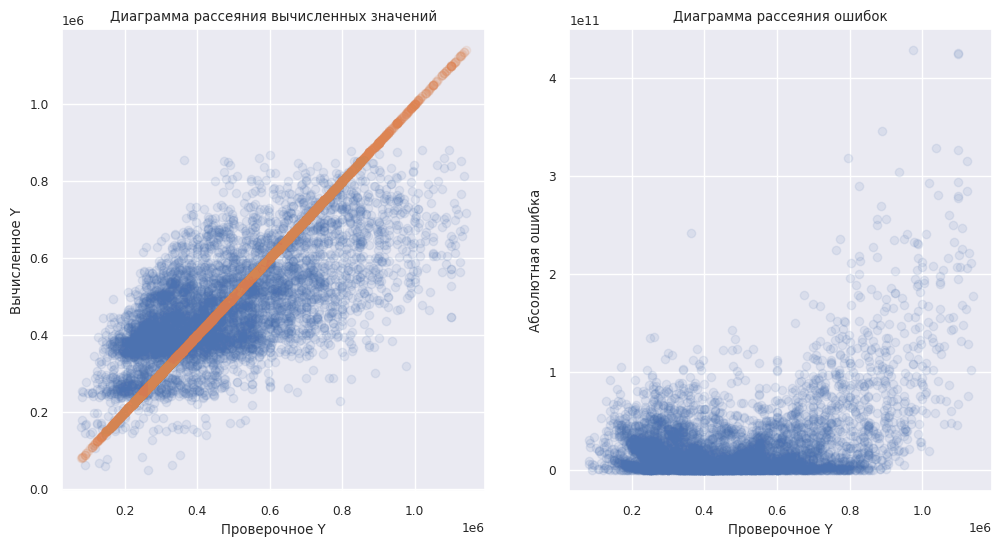

In [998]:
plt.figure(figsize=(12,6))

# создать первое полотно 121: 1-строк, 2-столбцов, 1-индекс в сетке
plt.subplot(121)
plt.scatter(y_test[['price']], y_pred_new,  alpha=0.1)
plt.scatter(y_test[['price']], y_test[['price']],  alpha=0.1)
plt.title('Диаграмма рассеяния вычисленных значений');
plt.xlabel('Проверочное Y')
plt.ylabel('Вычисленное Y')

# создать первое полотно 121: 1-строк, 2-столбцов, 2-индекс в сетке
plt.subplot(122)
plt.scatter(y_test[['price']], (y_test[['price']] - y_pred_new)**2,  alpha=0.1)

plt.title('Диаграмма рассеяния ошибок')
plt.xlabel('Проверочное Y')
plt.ylabel('Абсолютная ошибка')

In [999]:
print ("Линейная одномерная регрессия. Признак 'YearBuilt'.")
print ("y_pred_new (x) = x * {} + {}\n".format(
              model_new_fitted.coef_,
              model_new_fitted.intercept_))

'''
Вычисление и вывод метрик: MAE, RMSE, R2.
На основе сравнения проверочных и вычисленных.
'''
mae  = metrics.mean_absolute_error(y_test, y_pred_new)
mse  = metrics.mean_squared_error (y_test, y_pred_new)
rmse = np.sqrt(mse)
r2   = metrics.r2_score           (y_test, y_pred_new)

print ("MAE : {:>9,.3f} (средняя абсолютная ошибка)".format              ( mae ))
print ("MSE : {:>9,.6f} (среднеквадратичная ошибка)".format( mse ))
print ("RMSE: {:>9,.6f} (кв. корень из среднеквадратичной ошибки)".format( rmse ))
print ("R2  : {:>9,.3f} (коэфф. детерминации)".format                    ( r2 ))

Линейная одномерная регрессия. Признак 'YearBuilt'.
y_pred_new (x) = x * [[ 80980.68075739    105.35141258 -20135.39739156]] + [-299939.81258572]

MAE : 122,520.443 (средняя абсолютная ошибка)
MSE : 23,930,742,722.120472 (среднеквадратичная ошибка)
RMSE: 154,695.645453 (кв. корень из среднеквадратичной ошибки)
R2  :     0.421 (коэфф. детерминации)


## Соя НОВАЯ 2 модель


In [1000]:
print(corr_df[["price"]].abs().sort_values('price'))
print(tressholdDict)
x_test[:3]

                   price
date_dayofweek  0.000969
date_month      0.010174
date_day        0.013727
condition       0.036646
zipcode         0.052814
yr_built        0.053603
sqft_lot15      0.082355
sqft_lot        0.089674
yr_renovated    0.127156
floors          0.257403
waterfront      0.267288
bedrooms        0.308703
sqft_basement   0.321561
view            0.399090
bathrooms       0.524663
sqft_living15   0.586498
sqft_above      0.605302
grade           0.667790
sqft_living     0.701177
price           1.000000
{'sqft_living': (0, 4234), 'grade': (4, 10), 'sqft_above': (0, 4000), 'sqft_living15': (185, 3700), 'bathrooms': (0, 4), 'price': (80000, 1140000)}


,sqft_living,grade,sqft_above,sqft_living15,bathrooms
20871,1950.0,9.0,1610.0,2040.0,3.00
8367,3150.0,9.0,2250.0,2210.0,2.75
16891,2920.0,8.0,1460.0,2380.0,2.50


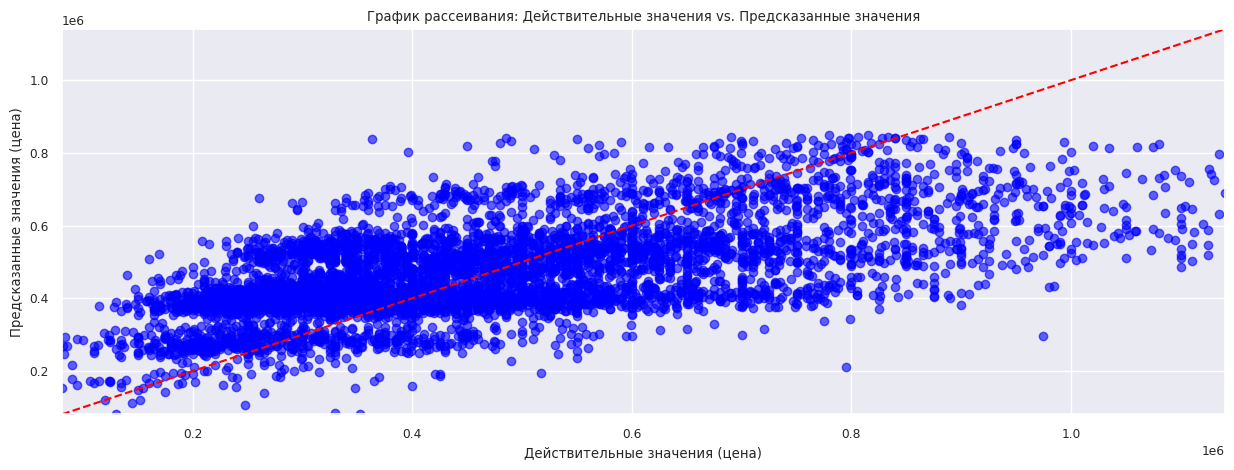

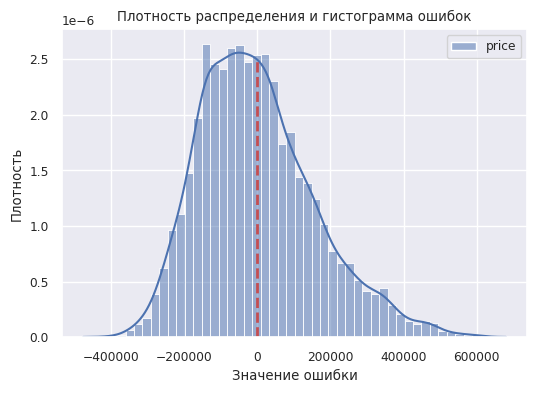

Линейная одномерная регрессия. Признак 'многа'.
y_pred_new2 (x) = x * [[7.68639518e+01 1.02668559e+01 9.10684106e+04]] + [-375045.33830733]

MAE : 126,034.997 (средняя абсолютная ошибка)
MSE : 25,462,681,899.546131 (среднеквадратичная ошибка)
RMSE: 159,570.303940 (кв. корень из среднеквадратичной ошибки)
R2  :     0.384 (коэфф. детерминации)
K   : 13979 (количество наблюдений)
B   : [[7.68639518e+01 1.02668559e+01 9.10684106e+04]] (коэффициент регрессии)


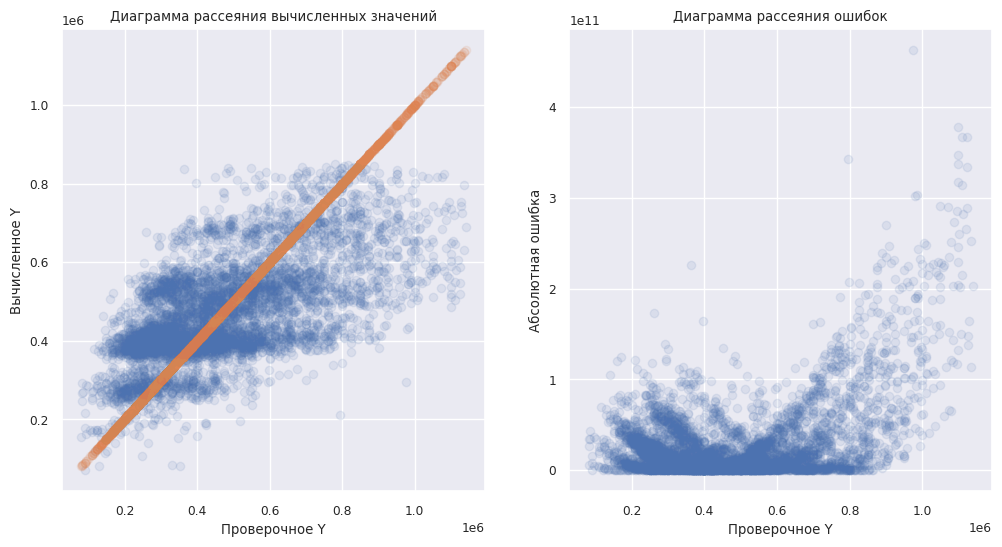

In [1008]:
model_new2 = linear_model.LinearRegression()
model_new_fitted2 = model_new.fit(
    x_train[['sqft_living15','sqft_above', 'grade']],
    y_train[['price']]
)
y_pred_new2 = model_new_fitted2.predict(x_test[['sqft_living15','sqft_above', 'grade']])

y_test_values = y_test['price'].values  # Замените 'price' на соответствующий столбец

# Создание графика рассеивания
plt.figure(figsize=(15, 5))
plt.scatter(y_test_values, y_pred_new2, alpha=0.6, color='blue')

# Добавление линии y=x для сравнения
plt.plot([y_test_values.min(), y_test_values.max()],
         [y_test_values.min(), y_test_values.max()],
         color='red', linestyle='--')

# Настройки графика
plt.title('График рассеивания: Действительные значения vs. Предсказанные значения')
plt.xlabel('Действительные значения (цена)')
plt.ylabel('Предсказанные значения (цена)')
plt.grid(True)
plt.xlim(y_test_values.min(), y_test_values.max())
plt.ylim(y_test_values.min(), y_test_values.max())
plt.show()

# ==============================

plt.figure(figsize=(6,4))

# Гистограмма и Плотность распределения - sns.distplot
# data = y_true - y_pred
sns.histplot( data = y_test[['price']] - y_pred_new2,
              color="red",
              kde=True, # оценка плотности в виде кривой
              stat="density",# density: общая площадь равна 1
            )

# Осевая линия
plt.plot(
    [0, 0],
    [0, 25 * pow(10,-7)], '--', lw=2, c='r')

plt.ylabel(u'Плотность')
plt.xlabel(u'Значение ошибки')
plt.title(u'Плотность распределения и гистограмма ошибок');
plt.show()

# ==============================

plt.figure(figsize=(12,6))

# создать первое полотно 121: 1-строк, 2-столбцов, 1-индекс в сетке
plt.subplot(121)
plt.scatter(y_test[['price']], y_pred_new2,  alpha=0.1)
plt.scatter(y_test[['price']], y_test[['price']],  alpha=0.1)
plt.title('Диаграмма рассеяния вычисленных значений');
plt.xlabel('Проверочное Y')
plt.ylabel('Вычисленное Y')

# создать первое полотно 121: 1-строк, 2-столбцов, 2-индекс в сетке
plt.subplot(122)
plt.scatter(y_test[['price']], (y_test[['price']] - y_pred_new2)**2,  alpha=0.1)

plt.title('Диаграмма рассеяния ошибок')
plt.xlabel('Проверочное Y')
plt.ylabel('Абсолютная ошибка')

# ==============================

print ("Линейная одномерная регрессия. Признак 'многа'.")
print ("y_pred_new2 (x) = x * {} + {}\n".format(
              model_new_fitted2.coef_,
              model_new_fitted2.intercept_))

'''
Вычисление и вывод метрик: MAE, RMSE, R2.
На основе сравнения проверочных и вычисленных.
'''
mae  = metrics.mean_absolute_error(y_test, y_pred_new2)
mse  = metrics.mean_squared_error (y_test, y_pred_new2)
rmse = np.sqrt(mse)
r2   = metrics.r2_score           (y_test, y_pred_new2)

print ("MAE : {:>9,.3f} (средняя абсолютная ошибка)".format              ( mae ))
print ("MSE : {:>9,.6f} (среднеквадратичная ошибка)".format( mse ))
print ("RMSE: {:>9,.6f} (кв. корень из среднеквадратичной ошибки)".format( rmse ))
print ("R2  : {:>9,.3f} (коэфф. детерминации)".format                    ( r2 ))
print ("K   : {} (количество наблюдений)" .format(x_train.shape[0]))
print ("B   : {} (коэффициент регрессии)" .format(model_new_fitted2.coef_))

# ИТОГИ

In [1011]:
import pandas as pd

ddf = pd.DataFrame (
    {
        "Признак": ["sqft_living", 'grade, sqft_living, bathrooms','sqft_living15, sqft_above, grade'],
        "K":       [167,     [ 809801, 105, -20135],     [7686395180, 1026685590, 9106841060000]],
        "B":       [145184,     -299939,     -375045],
        "MAE":     [132115,     122520,     126034],
        "RMSE":    [163540,     154695,     159570],
        "R2":      [0.353,      0.421,     0.384],
    }
 )
ddf

,Признак,K,B,MAE,RMSE,R2
0,sqft_living,167,145184,132115,163540,0.353
1,"grade, sqft_living, bathrooms","[809801, 105, -20135]",-299939,122520,154695,0.421
2,"sqft_living15, sqft_above, grade","[7686395180, 1026685590, 9106841060000]",-375045,126034,159570,0.384
